<a href="https://colab.research.google.com/github/raihanewubd/MLSummer24/blob/main/NLP_Deep_Model_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

Data source: https://data.mendeley.com/datasets/8fbdhh72gs/5

In [ ]:
!pip install --upgrade pip

!pip install tensorflow

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


# Load Dataset


In [ ]:
!gdown --id 1VEanmIImFMEkqt_4S9RuEdpUqQYMZaro

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VEanmIImFMEkqt_4S9RuEdpUqQYMZaro
To: /content/balanced_emotion_subset.csv
100% 12.0k/12.0k [00:00<00:00, 33.2MB/s]


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/balanced_emotion_subset.csv')

df.head()

,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type,emotion
0,995,6/6/2023,41,ðhow to join:\n\nâ¢ follow us &amp; @thund...,2,32,ðhow join â follow u amp thundercorelab twitte...,115.0,0.000199,"(amp,sushi)","{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.8519,POSITIVE,Neutral
1,1134,5/14/2023,49,$usdc currently holds the position of being th...,12,14,usdc currently hold position bridged asset eth...,118.0,0.000204,"(ethereum,usdc)","{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.6764,POSITIVE,Neutral
2,37566,9/13/2022,63,âï¸ come have breakfast with sushi in new y...,6,20,âï come breakfast sushi new york ðºð messarima...,149.0,0.000258,(sushi),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,Neutral
3,27978,2/13/2023,0,rt @spideycyp_155: students of ghana ð¬ð­ ...,0,915,rt spideycyp_155 student ghana ðð empowering b...,915.0,0.001582,(binance),"{'neg': 0.073, 'neu': 0.778, 'pos': 0.149, 'co...",0.3939,POSITIVE,Neutral
4,327,6/12/2023,105,fomc rate hike cancelled. $xrp lawsuit ending!...,42,14,fomc rate hike cancelled xrp lawsuit ending ga...,245.0,0.000424,"(link,bitcoin,xrp)","{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.7955,NEGATIVE,Sad


In [ ]:
df['clean_text']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         24 non-null     int64  
 1   created_at                         24 non-null     object 
 2   favorite_count                     24 non-null     int64  
 3   full_text                          24 non-null     object 
 4   reply_count                        24 non-null     int64  
 5   retweet_count                      24 non-null     int64  
 6   clean_text                         24 non-null     object 
 7   importance_coefficient             24 non-null     float64
 8   importance_coefficient_normalized  24 non-null     float64
 9   new_coins                          24 non-null     object 
 10  scores                             24 non-null     object 
 11  compound                           24 non-null     float64
 

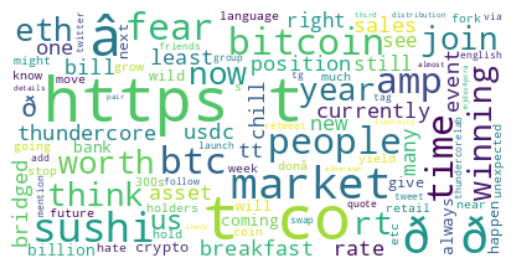

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# Word cloud for text data
text = ' '.join(df['full_text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

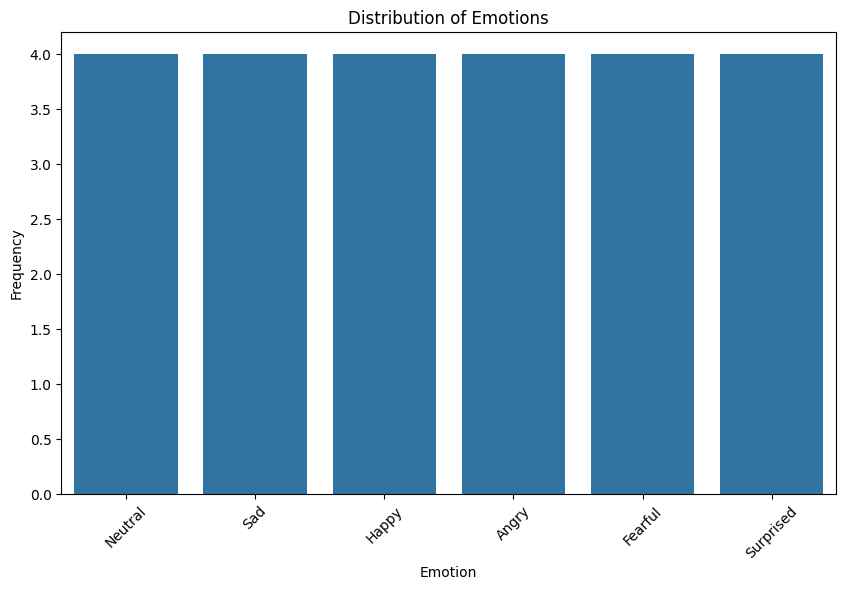

In [ ]:
# Calculate the value counts of the 'emotion' column
emotion_counts = df['emotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

## Text Data Analysis

In [ ]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters and numbers (optional, based on your requirement)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Tokenize by splitting the text into words
    tokens = text.split()
    return tokens

# Load your dataset
data = pd.read_csv('/content/balanced_emotion_subset.csv')

# Apply tokenization to your text column (replace 'text_column' with your actual text column name)
data['tokens'] = data['full_text'].apply(clean_and_tokenize)

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in data['tokens'] for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common tokens
most_common_tokens = token_counts.most_common(20)  # Adjust the number as needed
print(most_common_tokens)


[('the', 34), ('of', 17), ('to', 16), ('and', 14), ('is', 13), ('a', 10), ('on', 9), ('are', 8), ('at', 7), ('for', 7), ('that', 7), ('i', 7), ('with', 6), ('you', 6), ('all', 6), ('in', 5), ('market', 5), ('amp', 4), ('sushi', 4), ('be', 4)]


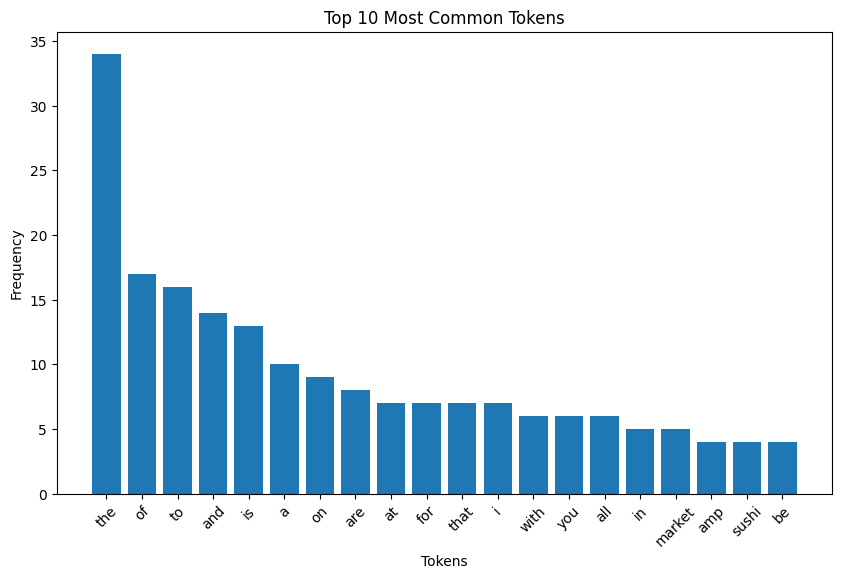

In [ ]:
# Separate tokens and their counts for plotting
tokens, counts = zip(*most_common_tokens)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.title('Top 10 Most Common Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# prompt: Using dataframe data: plot emotion bar plot

#data.plot(kind='bar', x='emotion', y='value')
data['emotion'].value_counts().plot(kind='bar')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


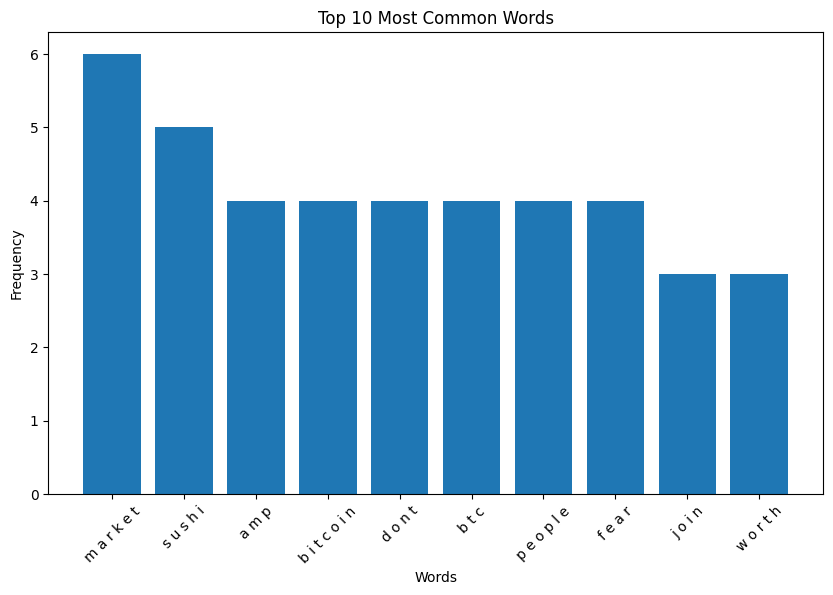

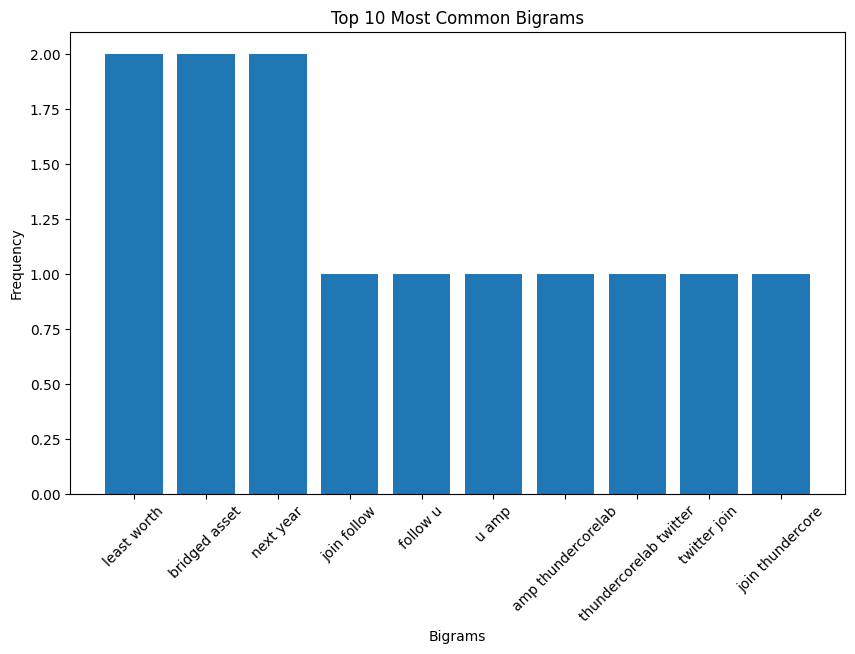

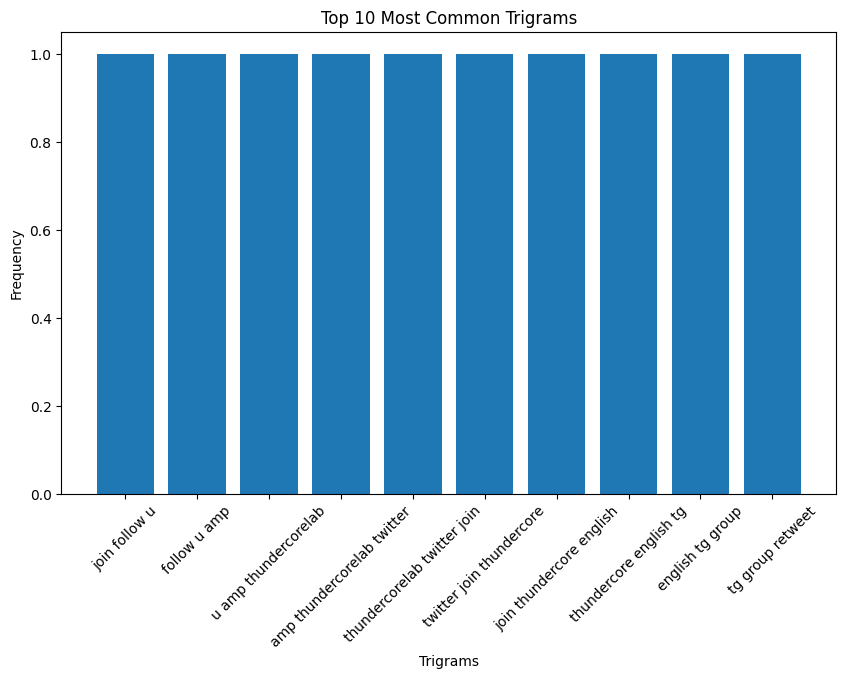

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import nltk
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv('/content/balanced_emotion_subset.csv')

# Stop words list
stop_words = set(stopwords.words('english'))

# Function to clean, tokenize and remove stop words
def process_text(text):
    # Lowercase and remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text).lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply text processing
data['processed_tokens'] = data['clean_text'].apply(process_text)

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in data['processed_tokens'] for token in sublist]
token_counts = Counter(all_tokens)

# Generate bigrams and trigrams
bigrams = [bigram for sublist in data['processed_tokens'] for bigram in ngrams(sublist, 2)]
trigrams = [trigram for sublist in data['processed_tokens'] for trigram in ngrams(sublist, 3)]

# Count bigrams and trigrams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Function to plot most common n-grams
def plot_ngrams(ngram_counts, title, n=10):
    # Get most common n-grams
    most_common_ngrams = ngram_counts.most_common(n)
    # Prepare data for plotting
    labels = [' '.join(ngram) for ngram, count in most_common_ngrams]
    values = [count for ngram, count in most_common_ngrams]
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.title(f'Top {n} Most Common {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plotting
plot_ngrams(token_counts, 'Words')
plot_ngrams(bigram_counts, 'Bigrams')
plot_ngrams(trigram_counts, 'Trigrams')


# Train BERT Model

BERT (Bidirectional Encoder Representations from Transformers) is a groundbreaking model in the field of natural language processing (NLP) developed by Google. Its structure and approach represented a significant shift in how language models were traditionally built. Here's an overview of its structure:

* Transformer Architecture: BERT is based on the Transformer architecture, which was introduced in the paper "Attention is All You Need" by Vaswani et al. The Transformer model is primarily known for its use of self-attention mechanisms, which enable the model to weigh the importance of different words in a sentence.

* Bidirectional Context: Unlike previous models that processed text in a single direction (either left-to-right or right-to-left), BERT reads the entire sequence of words at once. This bidirectionality allows the model to understand the context of a word based on all of its surroundings (both left and right of the word).

* Layers in BERT:

> * Input Embedding Layer: This layer converts each input token (word or subword) into vectors that represent them. These embeddings include token embeddings, segment embeddings, and position embeddings.
> > * Transformer Blocks: These are the core of the BERT model. Each block contains two sub-layers: a multi-head self-attention mechanism and a fully connected feed-forward network. BERT models vary in size, but the BERT-Base model contains 12 of these blocks, while BERT-Large has 24.
> > * Normalization and Activation Functions: Within each Transformer block, there are normalization steps and activation functions (like GELU - Gaussian Error Linear Units) that aid in the training and effectiveness of the model.
Pre-training and Fine-tuning:

> * Pre-training: BERT is pre-trained on a large corpus of text in an unsupervised manner using two tasks: Masked Language Model (MLM) and Next Sentence Prediction (NSP). In MLM, some percentage of the input tokens are masked, and the model is trained to predict them. In NSP, the model learns to predict if one sentence logically follows another.
> * Fine-tuning: After pre-training, BERT can be fine-tuned with additional output layers for various specific tasks like question answering, sentiment analysis, etc. During fine-tuning, the model is trained on a smaller, task-specific dataset.
> * Output: The output of BERT can be tailored for various NLP tasks. For instance, in classification tasks, the output from the [CLS] token (a special token added at the beginning of each input) is used for the final classification.

BERT's ability to understand the context of words in a sentence from both directions and its versatility in adapting to different NLP tasks made it a significant milestone in the field of AI and language understanding.

In [ ]:
# for local systems
# in colab its already installed
#pip install transfermers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


texts = df['full_text']  # or 'clean_text' based on your choice
labels = df['emotion']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text into input IDs, attention masks, and token type IDs
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

train_encodings = tokenize(train_texts.tolist())
test_encodings = tokenize(test_texts.tolist())

# Convert labels to numeric values
label_to_id = {label: id for id, label in enumerate(df['emotion'].unique())}
train_labels = train_labels.apply(lambda x: label_to_id[x])
test_labels = test_labels.apply(lambda x: label_to_id[x])




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Disable distribution strategy if not needed
tf.config.run_functions_eagerly(True)

texts = df['full_text']  # or 'clean_text' based on your choice
labels = df['emotion']

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2)

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text into input IDs, attention masks, and token type IDs
def tokenize(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='tf')

train_encodings = tokenize(train_texts.tolist())
test_encodings = tokenize(test_texts.tolist())

# Convert labels to numeric values
label_to_id = {label: id for id, label in enumerate(df['emotion'].unique())}
train_labels = train_labels.apply(lambda x: label_to_id[x])
test_labels = test_labels.apply(lambda x: label_to_id[x])

# Load the pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['emotion'].unique()))

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'Variable' object has no attribute '_distribute_strategy'

In [ ]:
# Load the pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['emotion'].unique()))

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
"""
model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)"""

history = model.fit(
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels,
    batch_size=8,
    epochs=3,
    validation_data=({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)
)


# Evaluate the model
#model.evaluate({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}, test_labels)

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
predictions = model.predict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})
predicted_labels = tf.argmax(predictions.logits, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert predictions and labels to numpy arrays for metric calculation
predicted_labels = predicted_labels.numpy()
true_labels = test_labels.to_numpy()

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Compute precision, recall, and F1-score
class_report = classification_report(true_labels, predicted_labels, target_names=label_to_id.keys(), output_dict=True)


In [ ]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_to_id.keys(), yticklabels=label_to_id.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_to_id.keys()))


# ELMO model

The ELMO (Embeddings from Language Models) model, introduced by researchers from the Allen Institute for AI, is a significant advancement in the field of natural language processing (NLP). It's designed to understand the context and meaning of words in a sentence more effectively than traditional word embeddings like Word2Vec or GloVe. Here's an overview of its structure and features:

* Contextualized Word Embeddings: Unlike traditional word embeddings, ELMO generates embeddings that are context-dependent. This means that the representation for a word can change based on the sentence in which it appears, allowing ELMO to capture nuances in meaning and syntax.

* Deep Bidirectional Language Model: ELMO uses a deep, bidirectional Long Short-Term Memory (LSTM) network. The bidirectional aspect means that it processes each word by looking at the context from both the left and the right side of the word in a sentence. This approach is different from earlier unidirectional language models, which only considered context from one direction (either left-to-right or right-to-left).

* Layered Representation: ELMO's model extracts features from multiple layers of the LSTM network. In a typical ELMO model, there are two LSTM layers stacked on top of each other. Each layer captures different types of information; for example, lower layers might capture syntactic aspects while higher layers capture more of the semantic content.

* Pre-training on Large Text Corpus: Before being used for specific tasks, ELMO is pre-trained on a large text corpus. During this phase, it learns a broad understanding of language, including grammar, word usage, and common phrases.

* Task-Specific Fine-Tuning: After pre-training, ELMO embeddings can be fine-tuned for specific tasks, like sentiment analysis, question answering, or language translation. This fine-tuning allows ELMO to adapt its general language understanding to the nuances of the specific task.

* Output and Integration: The final output of ELMO is a set of vectors for each word in the input sentence. These vectors can be easily integrated into various NLP models (like neural networks for classification tasks) to enhance their performance by providing more accurate and context-aware word representations.

In [ ]:
# pip install tensorflow tensorflow-hub pandas scikit-learn

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
# Load dataset
file_path = '/content/balanced_emotion_subset.csv'
data = pd.read_csv(file_path)

# Preprocess data
texts = data['clean_text'].astype(str)
labels = pd.factorize(data['sentiment_type'])[0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [ ]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")

def elmo_embeddings(texts):
    embeddings = elmo.signatures['default'](tf.constant(texts))['elmo']
    return embeddings


In [ ]:
def batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset+batch_size]
            batch_labels = y[offset:offset+batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels

def validation_batch_generator(X, y, batch_size):
    while True:
        for offset in range(0, len(X), batch_size):
            batch_texts = X[offset:offset + batch_size]
            batch_labels = y[offset:offset + batch_size]
            yield elmo_embeddings(batch_texts.tolist()), batch_labels


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024, 1024), dtype=tf.float32),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
batch_size = 32
steps_per_epoch = max(1, len(X_train) // batch_size)
validation_steps = max(1, len(X_test) // batch_size)

history = model.fit(batch_generator(X_train, y_train, batch_size),
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_batch_generator(X_test, y_test, batch_size),
                    validation_steps=validation_steps,
                    epochs=10)


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Convert probabilities to discrete predictions
test_pred_labels = np.argmax(test_pred, axis=1)

# Calculate metrics with appropriate averaging for multi-class classification
precision = precision_score(y_test, test_pred_labels, average='macro')
recall = recall_score(y_test, test_pred_labels, average='macro')
f1 = f1_score(y_test, test_pred_labels, average='macro')
conf_matrix = confusion_matrix(y_test, test_pred_labels)

# Display metrics
print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)


# XLNet

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/balanced_emotion_subset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


In [ ]:
#!pip install SentencePiece
# then restart the session

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer
from transformers import DataCollatorWithPadding
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
#data = pd.read_csv('path_to_your_dataset.csv')

# Encode the labels
label_encoder = LabelEncoder()
data['encoded_emotion'] = label_encoder.fit_transform(data['emotion'])

# Ensure the text column is a list of strings
data['clean_text'] = data['clean_text'].astype(str)

# Split the dataset
train_text, temp_text, train_labels, temp_labels = train_test_split(
    data['clean_text'].tolist(), data['encoded_emotion'].tolist(), test_size=0.3, random_state=42
)
val_text, test_text, val_labels, test_labels = train_test_split(
    temp_text, temp_labels, test_size=0.5, random_state=42
)

# Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(text_list):
    return tokenizer(text_list, padding='max_length', truncation=True, max_length=128, return_tensors='tf')

# Tokenize data
train_encodings = tokenize_function(train_text)
val_encodings = tokenize_function(val_text)
test_encodings = tokenize_function(test_text)

# Convert labels to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

# Model
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
model.fit(train_dataset.shuffle(1000).batch(16), epochs=3, batch_size=16, validation_data=val_dataset.batch(16))

# Evaluate the model
eval_results = model.evaluate(test_dataset.batch(16))
print(f"Test Loss: {eval_results[0]}, Test Accuracy: {eval_results[1]}")




In [ ]:
# Predictions for confusion matrix
y_pred = model.predict(test_dataset.batch(16)).logits
y_pred = tf.argmax(y_pred, axis=1).numpy()

# Get the unique classes in test_labels
unique_classes = np.unique(test_labels)

# Generate target names based on unique classes
target_names = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]

print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))
